## 將所有需要的套件與函數 import 至目前的環境中 
若沒有執行下面這段 code，等等使用 function 就會看到 Name Error

In [32]:
# libraries & packages
%matplotlib inline
import keras
from keras.datasets import cifar10
import numpy
import math
import sys
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from keras.optimizers import SGD
from keras.utils import to_categorical

## 讀取 CIFAR-10 資料集
檔案分為 train 訓練集、test 測試集，X 是圖片且 shape = (32x32x3)，Y 是 label 且是個一維的向量

In [33]:
from keras.datasets import cifar10
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


## 觀察資料集

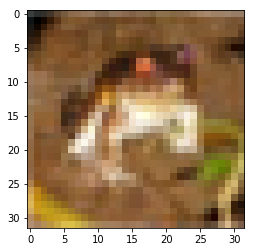

In [34]:
import matplotlib.pyplot as plt
# show the first image of training data
plt.imshow(x_train[0])
plt.show()

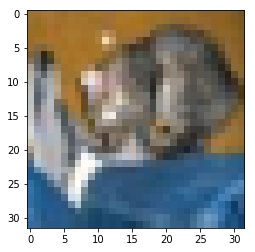

In [35]:
import matplotlib.pyplot as plt
# show the first image of testing data
plt.imshow(x_test[0])
plt.show()

印出前五個 training data 的 label，分別是 frog, truck, truck, deer, automobile

In [36]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

## 將數字 label 轉為 one hot encoding

In [37]:
from keras.utils import to_categorical
num_classes = 10
print("shape before one hot encoding: ", y_train.shape)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("shape after one hot encoding: ", y_train.shape)

shape before one hot encoding:  (50000, 1)
shape after one hot encoding:  (50000, 10)


## 建立 CNN 的 model
1. 先做了兩次 convolution，filters=32, filter size=3x3, stride=1, 第一次 convolution 使用 zero padding，第二次不使用。
2. 做了一次 MaxPooling，pooling size=2x2
3. 隨機 dropout 25% 的 weights
4. 攤平所有的 feature maps，變成一維的向量
5. 接上 512 個 nuerons 的 DNN
6. 隨機 dropout 50% 的 weights
7. 最後接上 10 個 nuerons，而這十個 nuerons 經過 softmax 後，就是 Cifar-10 十個 label 的 prediction 

In [8]:
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D

model = Sequential()
# first convolution & maxpooling

# Convolutaion layer
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", input_shape=x_train[0].shape))
# Activation layer
model.add(Activation('relu'))
# Convolutaion layer
model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=1))
# Activation layer
model.add(Activation('relu'))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 請建立更多的 convolution layers，並嘗試調整 filter 數量或其他參數

#--- your codes here ---

#--- your codes here ---

# connetct to DNN and use soft max to make prediction
# Flatten layer
model.add(Flatten())
# Dense Layer
model.add(Dense(512))
# Activation Layer
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
__________

## 使用 Adam 做為 Optimizer 
設定 learning_rate = 0.00017，loss 使用 categorical cross-entropy，評估 model 的表現指標使用 accuracy，並 compile model

In [9]:
from keras.optimizers import Adam

learning_rate = 0.00017
optimizer = Adam(lr=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## 設定 batch size, epochs 及資料前處理
設定 batch size = 32, 跑 10 個 epoch (看完所有資料 10 次)，並將圖片 data 都 recale 到 0 ~ 1 之間


In [10]:
batch_size = 32
epochs = 10

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## 開始訓練!!
將 trainging data fit 進 model 中，設定 batch size 及 epoch，設定 validation data，跑完一個 epoch 會自動計算 validaiton data 的 performance，training 的過程會 shuffle data，訓練完後將 model 的訓練過程存到 model_history 這個變數

In [11]:
model_history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 12s - loss: 1.5817 - acc: 0.4303 - val_loss: 1.2772 - val_acc: 0.5460
Epoch 2/10
50000/50000 [==============================] - 10s - loss: 1.2436 - acc: 0.5610 - val_loss: 1.1217 - val_acc: 0.6017
Epoch 3/10
50000/50000 [==============================] - 10s - loss: 1.1110 - acc: 0.6065 - val_loss: 1.0381 - val_acc: 0.6401
Epoch 4/10
50000/50000 [==============================] - 10s - loss: 1.0131 - acc: 0.6430 - val_loss: 0.9707 - val_acc: 0.6603
Epoch 5/10
50000/50000 [==============================] - 10s - loss: 0.9418 - acc: 0.6686 - val_loss: 0.9323 - val_acc: 0.6724
Epoch 6/10
50000/50000 [==============================] - 10s - loss: 0.8828 - acc: 0.6885 - val_loss: 0.9069 - val_acc: 0.6875
Epoch 7/10
50000/50000 [==============================] - 10s - loss: 0.8232 - acc: 0.7131 - val_loss: 0.8719 - val_acc: 0.6964
Epoch 8/10
50000/50000 [==============================

## 畫出訓練過程的 learning curve

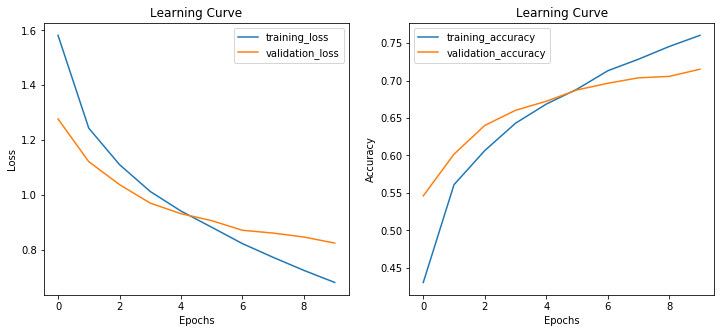

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
training_loss = model_history.history['loss']
testing_loss = model_history.history['val_loss']
training_acc = model_history.history['acc']
testing_acc = model_history.history['val_acc']

plt.subplot(121)
plt.plot(training_loss, label="training_loss")
plt.plot(testing_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')

plt.subplot(122)

plt.plot(training_acc, label="training_accuracy")
plt.plot(testing_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')

plt.show()

## 將訓練完的 model 進行儲存、讀取與用來預測

In [24]:
from keras.models import load_model

model.save("first_cnn_cifar10.h5")
del model
model = load_model("first_cnn_cifar10.h5")
y_pred = model.predict_classes(x_test, verbose=1)

 9664/10000 [===========================>..] - ETA: 0s

In [25]:
print(y_pred)

[3 8 8 ..., 5 1 7]
